In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
# Load your dataset (pipe-separated)
df = pd.read_csv(r"C:\Users\ZAK-TECH\Desktop\KAIM week 3\End-to-End-Insurance-Risk-Analytic\data\MachineLearningRating_v3.txt", sep="|")

df.head()


C:\Users\ZAK-TECH\AppData\Local\Temp\ipykernel_21592\1057217091.py:2: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\ZAK-TECH\Desktop\KAIM week 3\End-to-End-Insurance-Risk-Analytic\data\MachineLearningRating_v3.txt", sep="|")


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [7]:
# Descriptive statistics for numerical columns
numerical_cols = ['TotalPremium', 'TotalClaims', 'SumInsured', 'CalculatedPremiumPerTerm', 'CustomValueEstimate', 'CapitalOutstanding']  # add more if relevant
print(df[numerical_cols].describe())


# Data types
print(df.dtypes)

       TotalPremium   TotalClaims    SumInsured  CalculatedPremiumPerTerm  \
count  1.000098e+06  1.000098e+06  1.000098e+06              1.000098e+06   
mean   6.190550e+01  6.486119e+01  6.041727e+05              1.178757e+02   
std    2.302845e+02  2.384075e+03  1.508332e+06              3.997017e+02   
min   -7.825768e+02 -1.200241e+04  1.000000e-02              0.000000e+00   
25%    0.000000e+00  0.000000e+00  5.000000e+03              3.224800e+00   
50%    2.178333e+00  0.000000e+00  7.500000e+03              8.436900e+00   
75%    2.192982e+01  0.000000e+00  2.500000e+05              9.000000e+01   
max    6.528260e+04  3.930921e+05  1.263620e+07              7.442217e+04   

       CustomValueEstimate  
count         2.204560e+05  
mean          2.255311e+05  
std           5.645157e+05  
min           2.000000e+04  
25%           1.350000e+05  
50%           2.200000e+05  
75%           2.800000e+05  
max           2.655000e+07  
UnderwrittenCoverID           int64
PolicyID 

UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoors               

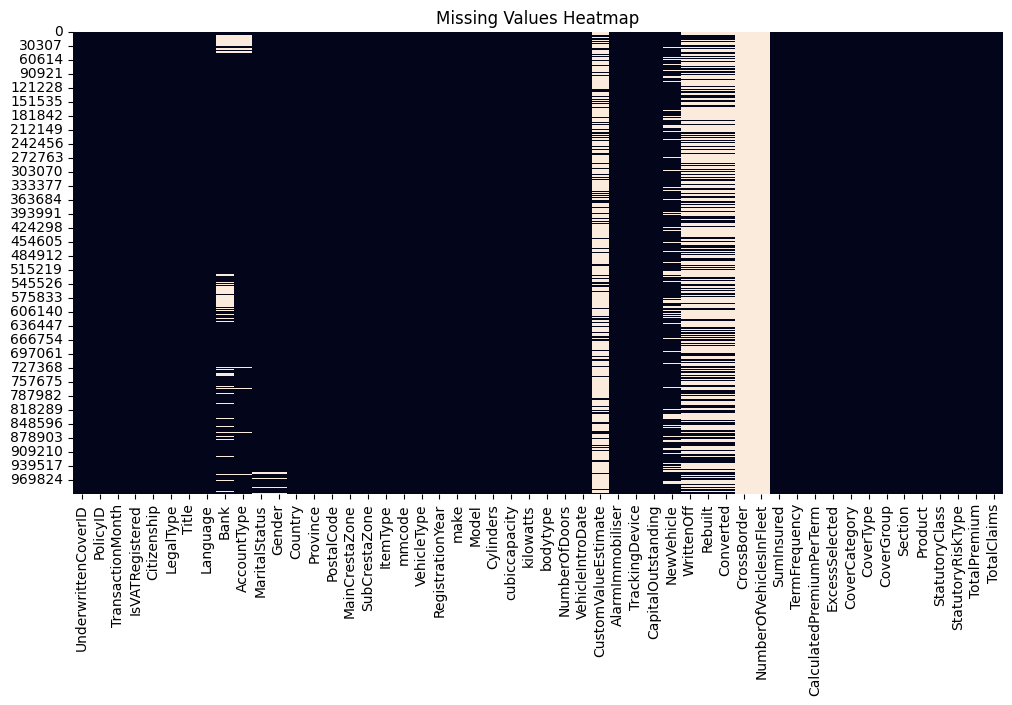

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check missing values
print(df.isnull().sum())

# Visualize missing values
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


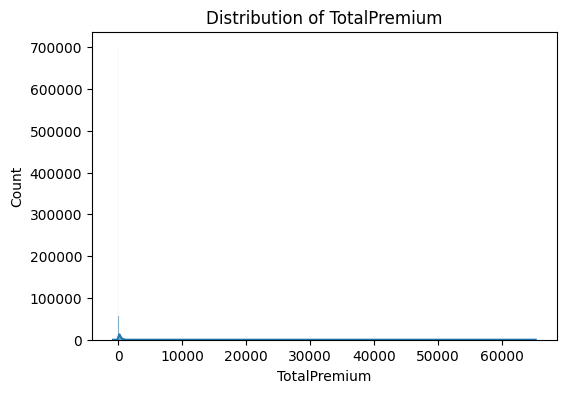

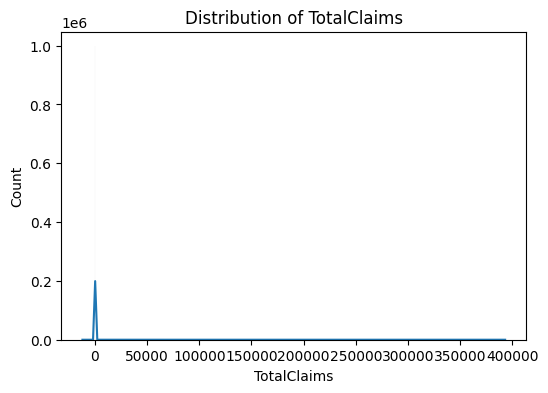

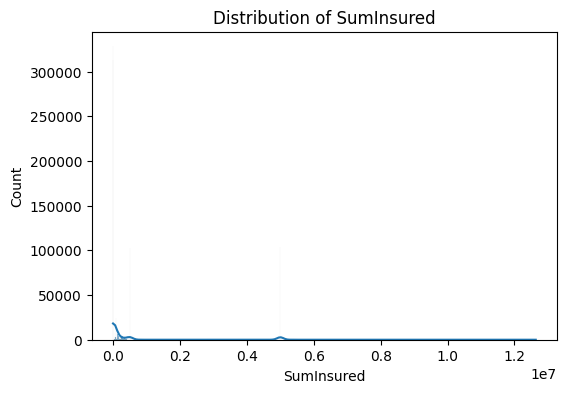

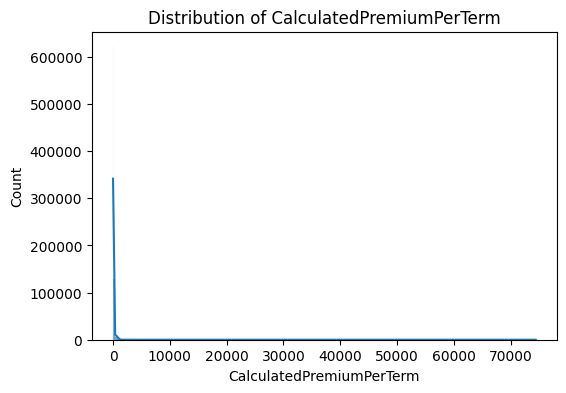

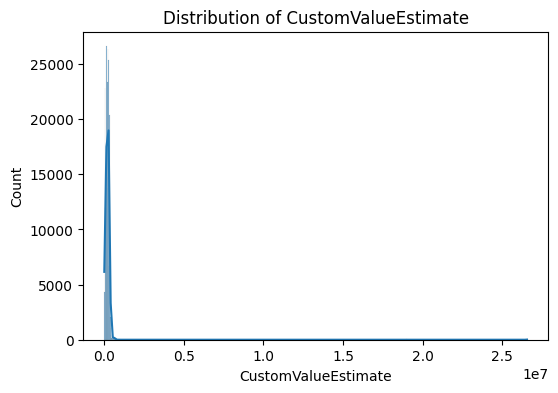

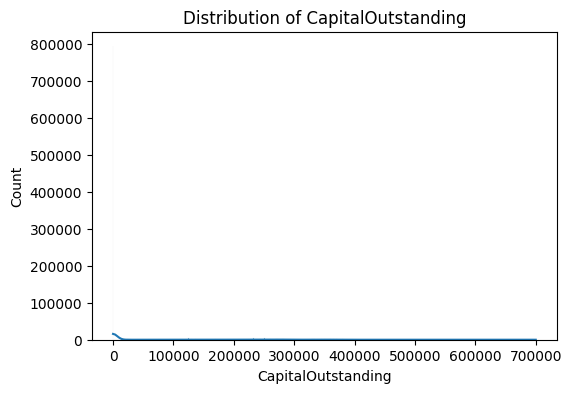

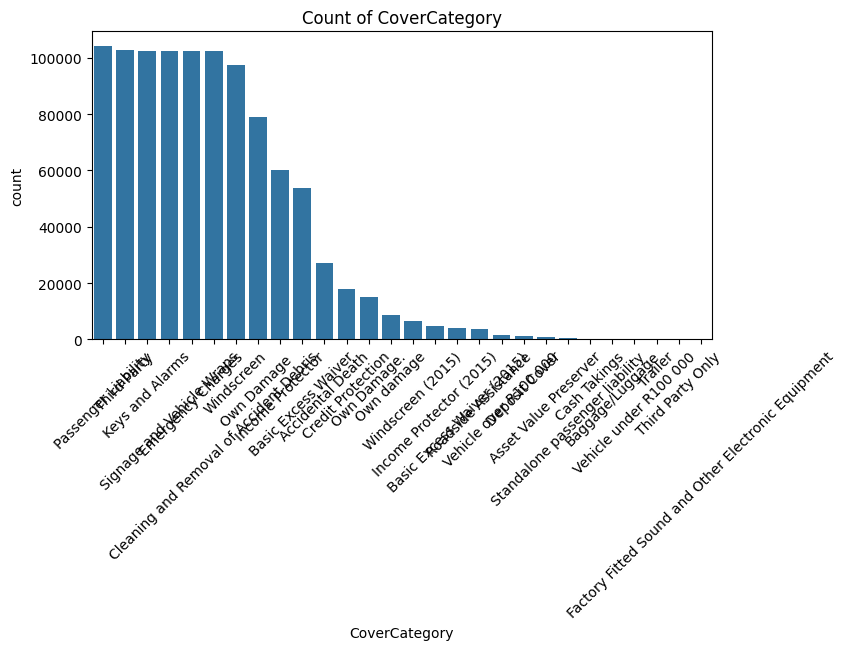

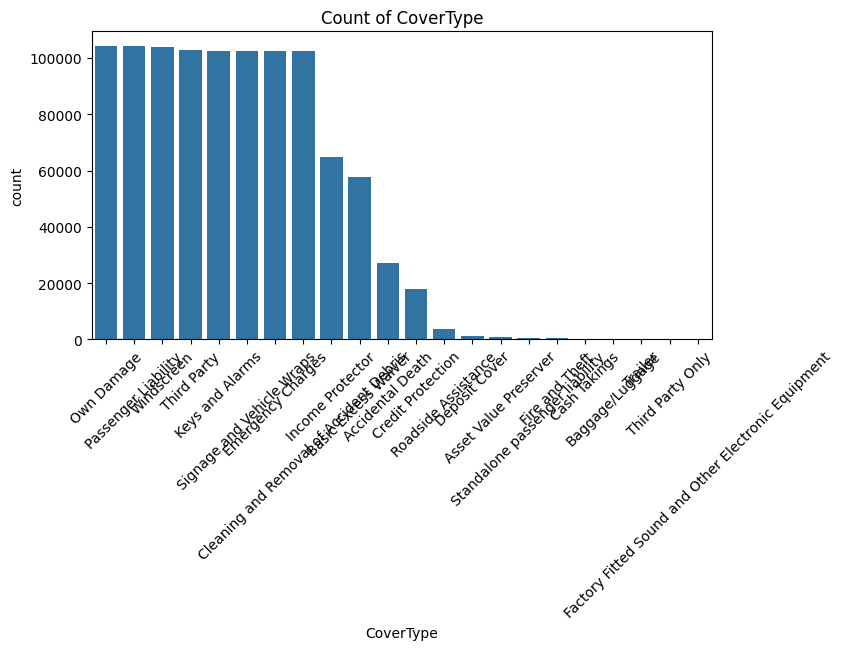

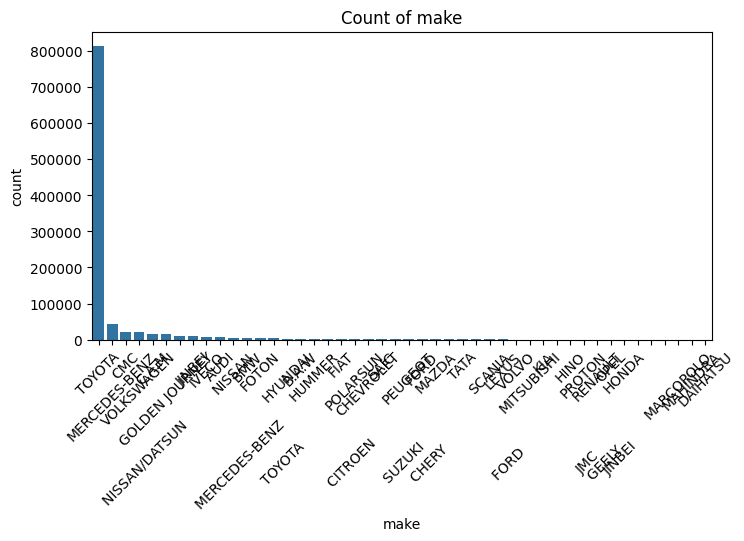

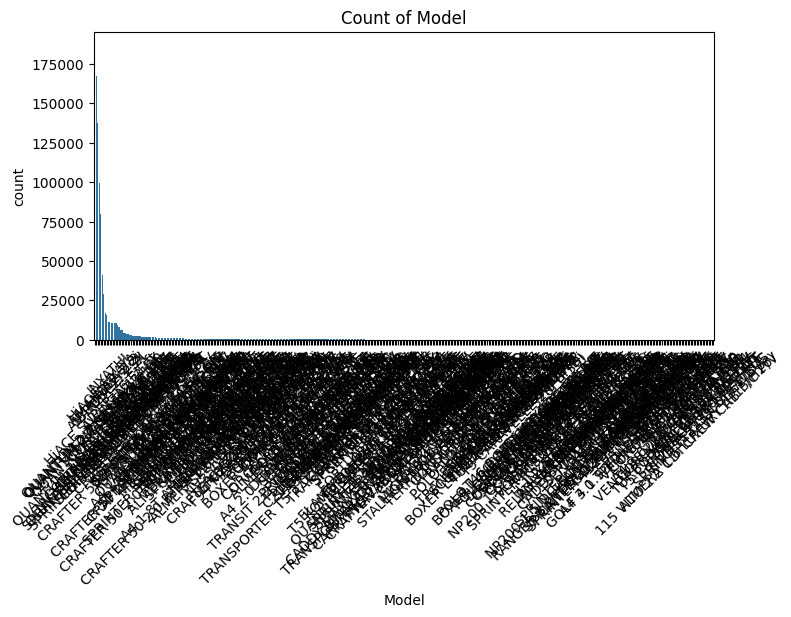

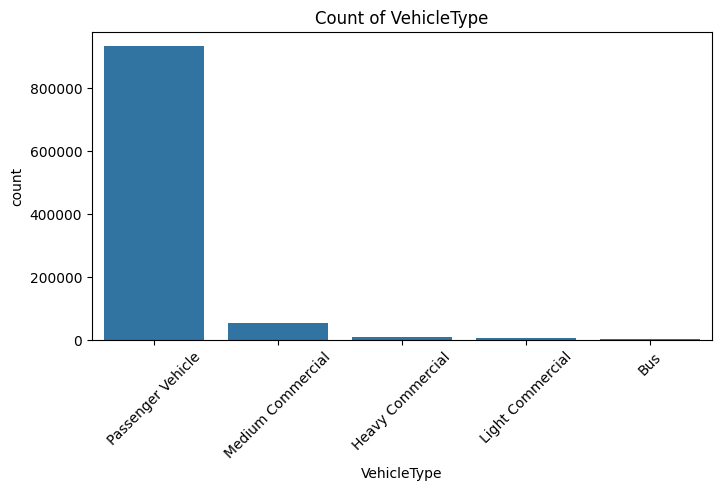

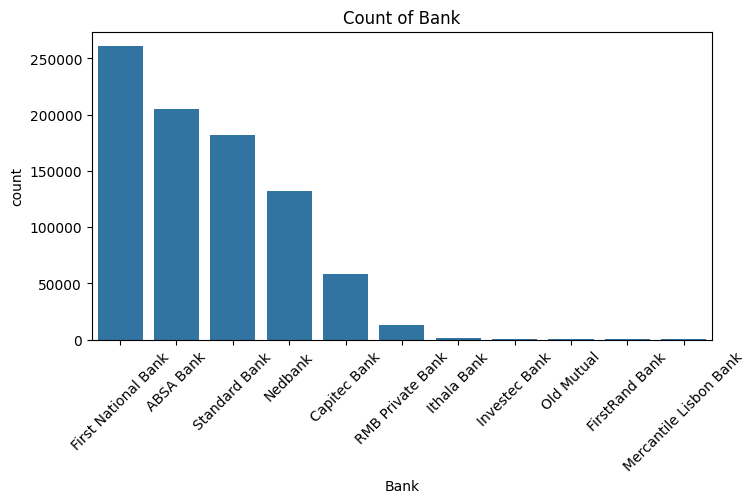

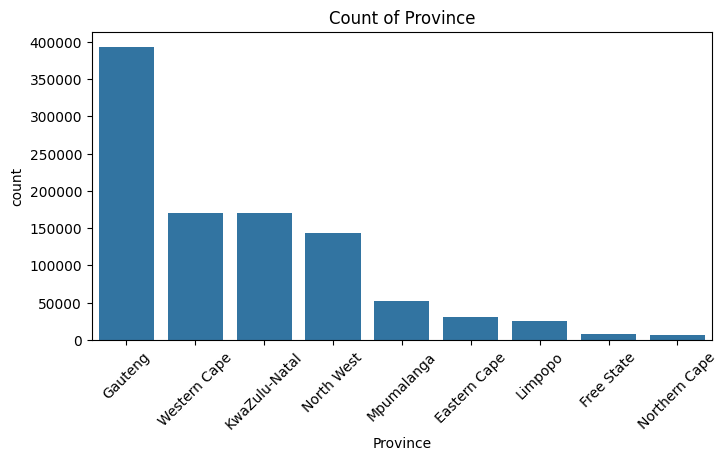

In [18]:
# Numerical columns - histograms
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# Categorical columns - bar plots
categorical_cols = ['CoverCategory', 'CoverType', 'make', 'Model', 'VehicleType', 'Bank', 'Province']  # example categorical columns
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
    plt.show()


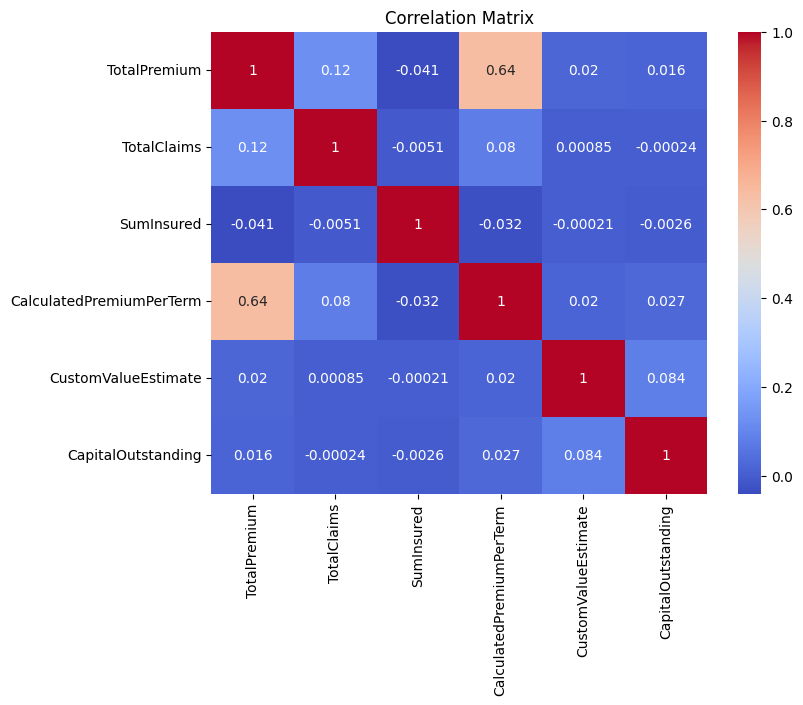

c:\Users\ZAK-TECH\Desktop\KAIM week 3\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


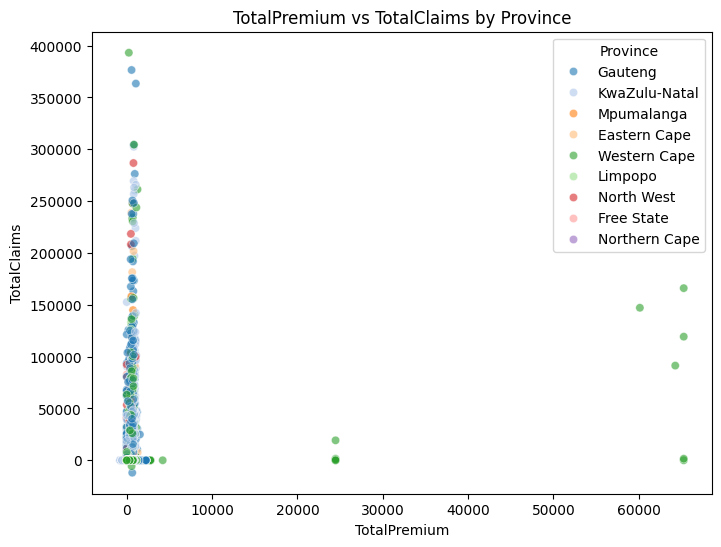

In [14]:

for col in numerical_cols:
    df[col] = df[col].astype(str).str.replace(",", ".").astype(float)
# Correlation matrix for numerical columns
plt.figure(figsize=(8,6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Scatter plot: TotalPremium vs TotalClaims colored by Province
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='TotalPremium', y='TotalClaims', hue='Province', palette='tab20', alpha=0.6)
plt.title("TotalPremium vs TotalClaims by Province")
plt.show()


C:\Users\ZAK-TECH\AppData\Local\Temp\ipykernel_21592\2416344546.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=geo_trends, x='Province', y='TotalPremium', palette='viridis')


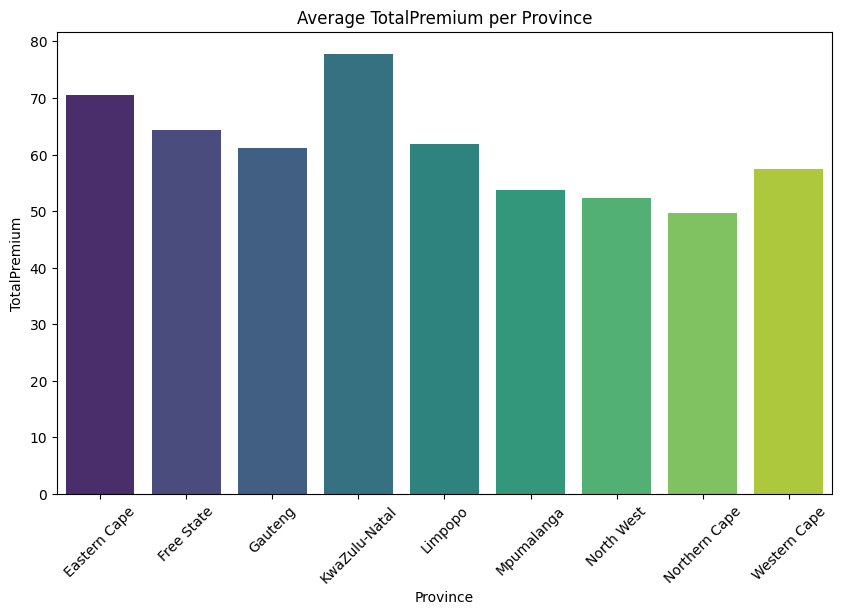

In [11]:
# Average TotalPremium per Province
geo_trends = df.groupby('Province')[['TotalPremium', 'TotalClaims']].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=geo_trends, x='Province', y='TotalPremium', palette='viridis')
plt.xticks(rotation=45)
plt.title("Average TotalPremium per Province")
plt.show()


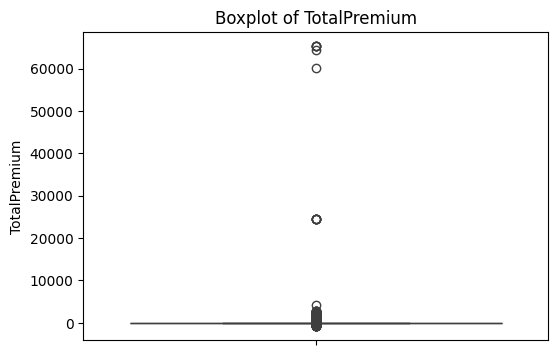

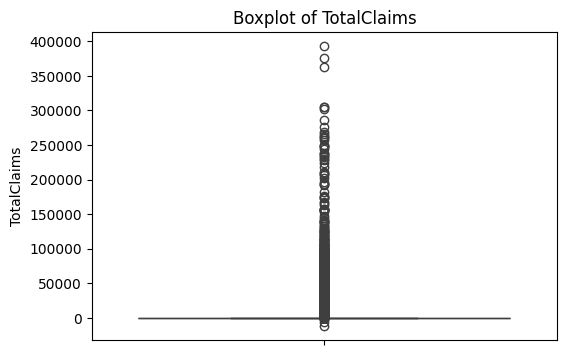

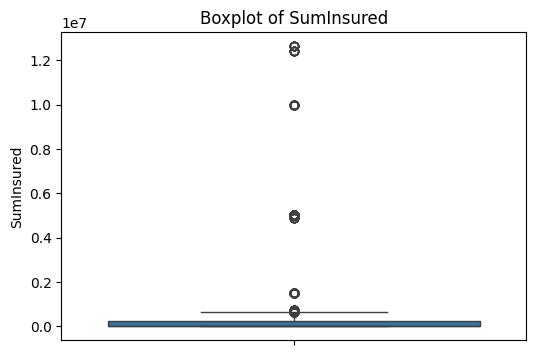

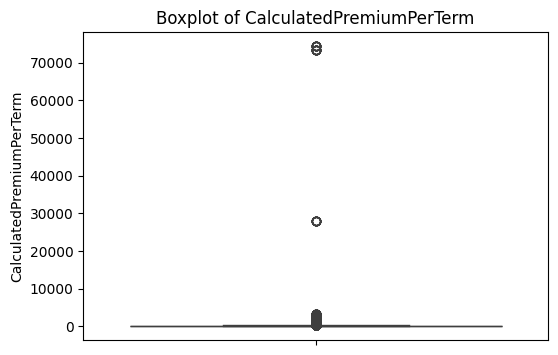

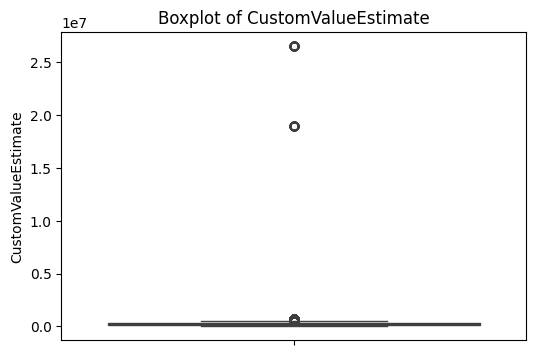

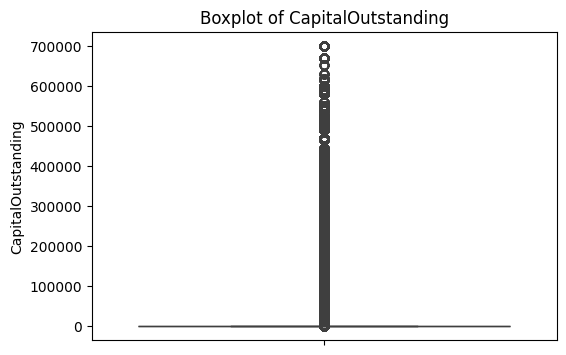

In [15]:
for col in numerical_cols:
    df[col] = df[col].astype(str).str.replace(",", ".").astype(float)
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
plt.show()


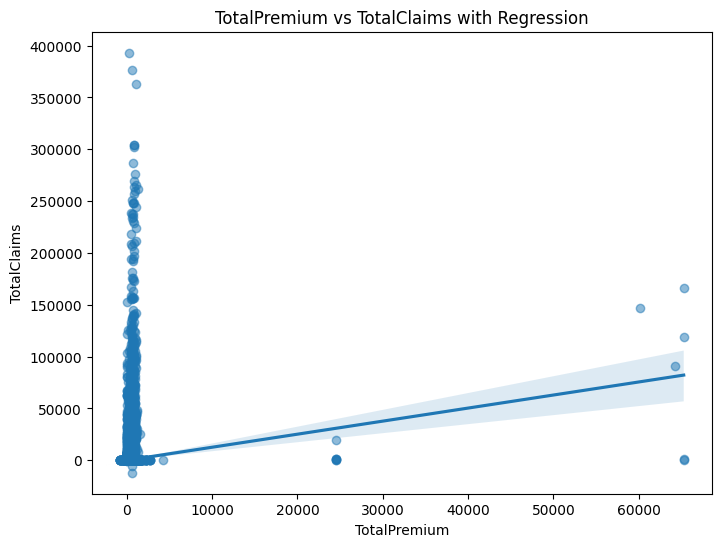

C:\Users\ZAK-TECH\AppData\Local\Temp\ipykernel_21592\623787155.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='CoverType', y='TotalPremium', palette='Set2')


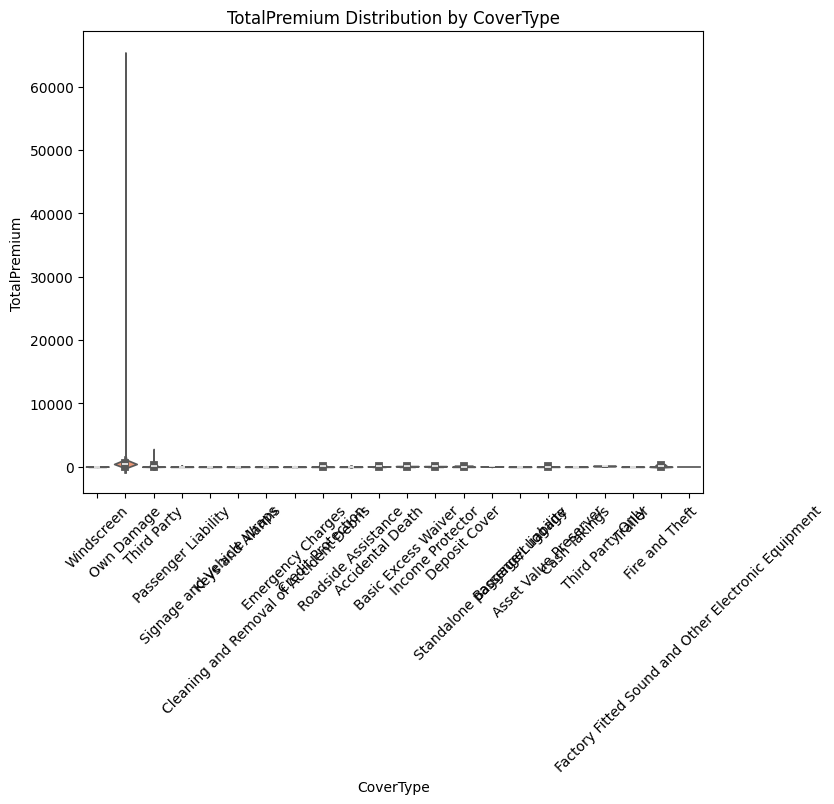

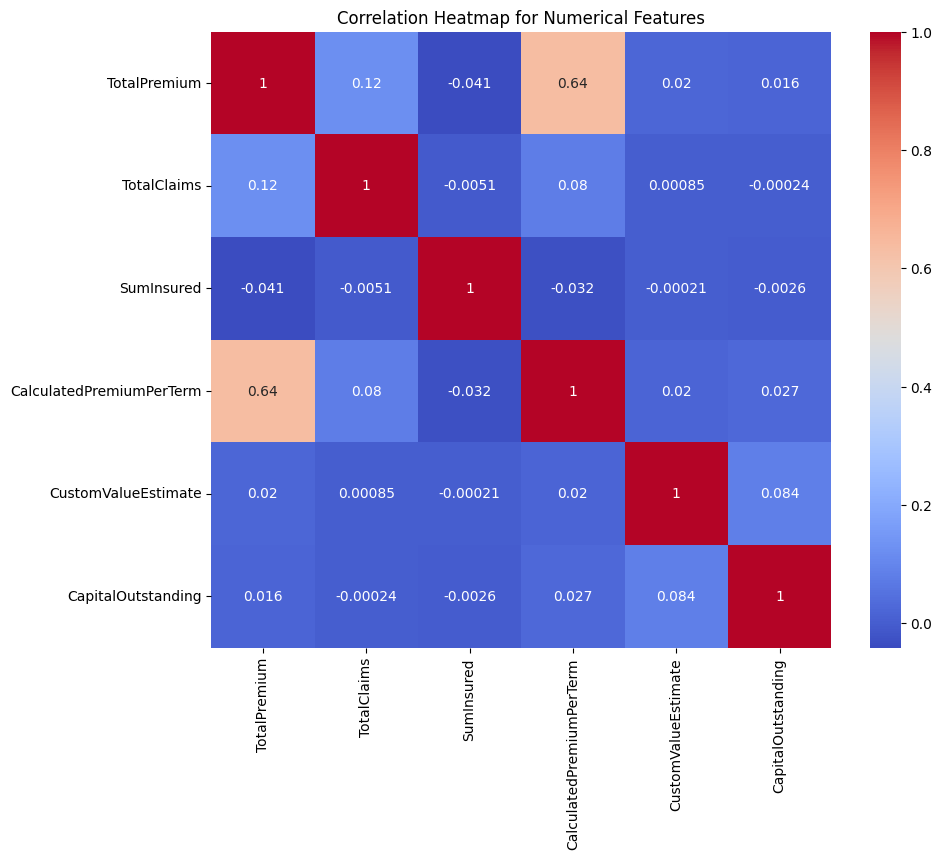

In [16]:
# 1. TotalPremium vs TotalClaims with regression
plt.figure(figsize=(8,6))
sns.regplot(data=df, x='TotalPremium', y='TotalClaims', scatter_kws={'alpha':0.5})
plt.title("TotalPremium vs TotalClaims with Regression")
plt.show()

# 2. TotalPremium distribution by CoverType
plt.figure(figsize=(8,6))
sns.violinplot(data=df, x='CoverType', y='TotalPremium', palette='Set2')
plt.title("TotalPremium Distribution by CoverType")
plt.xticks(rotation=45)
plt.show()

# 3. Heatmap of correlations for all numerical columns
plt.figure(figsize=(10,8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap for Numerical Features")
plt.show()
